# fraction
(Fig 14)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.stats

def get_large_values_number(x):
    index = x.columns[1:5]
    y = x[index].iloc[1]
    cut = 2
    index_1 = np.append(index,'larger_than_pi_dividedby%d'%(cut))
    y_1 = np.append(y,np.sum(x.residual_arg_range.values>np.pi/cut))
    cut = 5
    index_2 = np.append(index_1,'larger_than_pi_dividedby%d'%(cut))
    y_2 = np.append(y_1,np.sum(x.residual_arg_range.values>np.pi/cut))
    cut = 10
    index_3 = np.append(index_2,'larger_than_pi_dividedby%d'%(cut))
    y_3 = np.append(y_2,np.sum(x.residual_arg_range.values>np.pi/cut))
    return pd.Series(y_3, index=index_3)
# here you can change the parameter "cut" by yourself

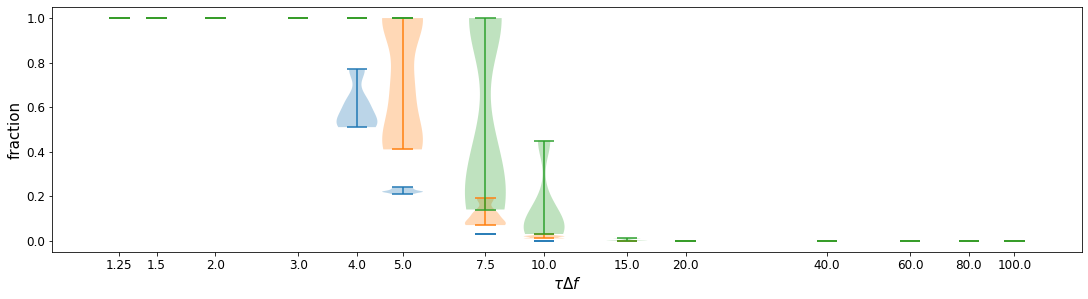

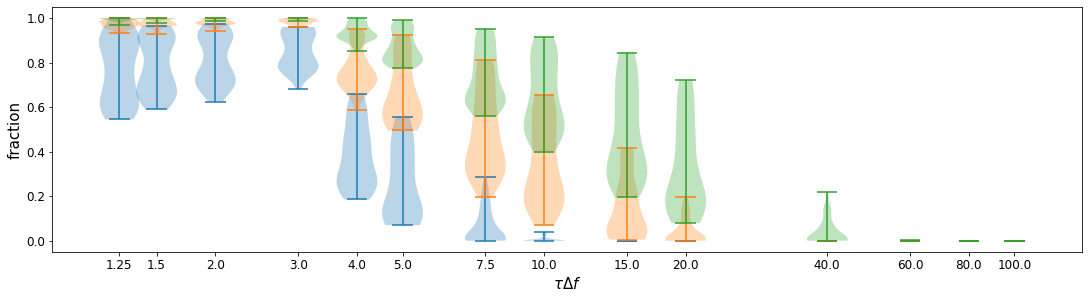

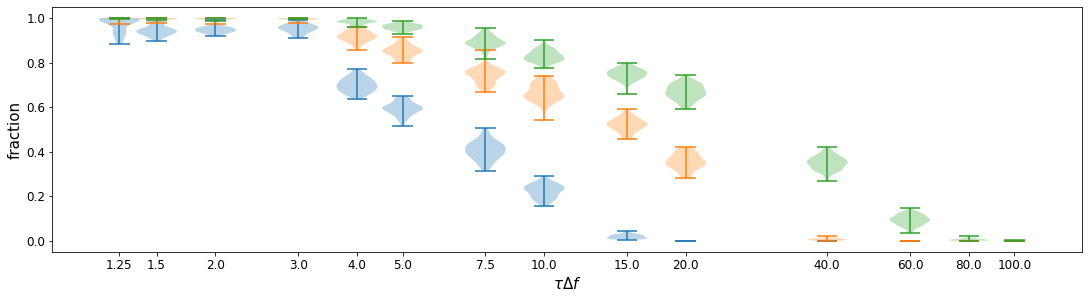

In [32]:
for data_names,names in zip(['data_version2/data_fixto0.csv','data_version2/data_fixt0.csv','data_version2/data_nofix.csv'],['violin_fixt0delta0','violin_fixt0','violin_nofix']):
    data = pd.read_csv(data_names)
    datanew = data.groupby("group_index",as_index=False).apply(get_large_values_number)
    for index_divided_by in [2,5,10]:
        datanew["larger_ratio_dividedby%d"%index_divided_by]=datanew["larger_than_pi_dividedby%d"%index_divided_by]/datanew.numbers
    datanew["qfactor"]=round(datanew.tau*datanew.spacing,2)

    fig, ax = plt.subplots(figsize = (15,4),constrained_layout=True)
    for index_divided_by in [2,5,10]:
        test = []
        for qfactor in np.unique(datanew['qfactor']):
            datanew3 = datanew[datanew.qfactor == qfactor]
            test.append(datanew3["larger_ratio_dividedby%d"%index_divided_by].values)
            
        ax.violinplot(test,positions =np.log(np.unique(datanew['qfactor'])),widths=0.2)
    #ax.set_xscale('log')
    ax.set_xticks(np.log(np.unique(datanew['qfactor'])))
    ax.set_xticklabels([str(x) for x in np.unique(datanew['qfactor'])],fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(r'$\tau\Delta f$',fontsize=15)
    ax.set_ylabel("fraction",fontsize=15)
    plt.savefig(names+".pdf",dpi=300)
    plt.show()

# posterior
FIG 15
## left 

In [1]:
import pandas as pd
import scipy
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import bilby
import corner

from glob import glob

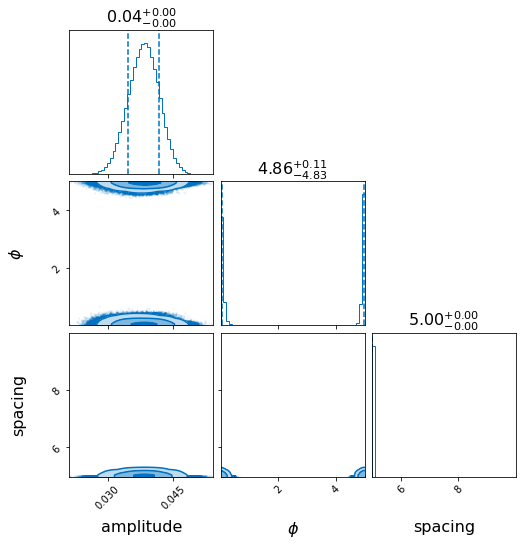

In [2]:
result_json_index_fre_5 = glob('npoints=1000_duration=50_time_domain_QNM_tau1_fix_fredomain/newlikelihood/*0.038*.json')
result_json_index_fre_5.sort()
len(result_json_index_fre_5)
posterior_array_fre_5 = [bilby.result.read_in_result(result_single).posterior for result_single in result_json_index_fre_5]
posterior_all_plus_fre_5 = pd.concat(posterior_array_fre_5,ignore_index=True)

result_fre_5 = bilby.result.read_in_result(result_json_index_fre_5[0])
result_fre_5.posterior = posterior_all_plus_fre_5
result_fre_5.plot_corner(save=False)
plt.show()


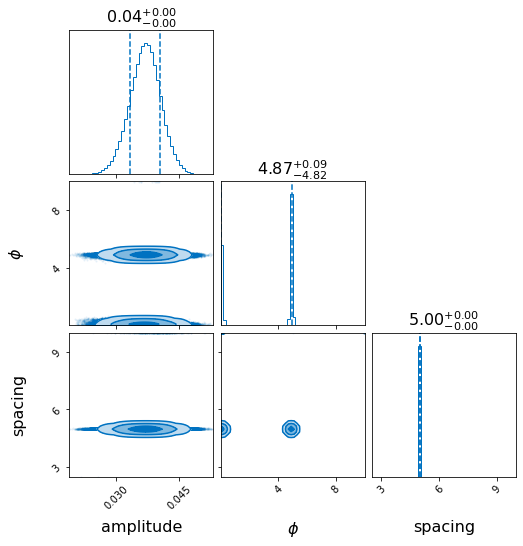

In [3]:
result_json_index_timenofix_5 = glob('npoints=1000_duration=50_time_domain_QNM_tau1_nofix/newlikelihood/*0.038*.json')
result_json_index_timenofix_5.sort()
len(result_json_index_timenofix_5)
posterior_array_timenofix_5 = [bilby.result.read_in_result(result_single).posterior for result_single in result_json_index_timenofix_5]
posterior_all_plus_timenofix_5 = pd.concat(posterior_array_timenofix_5,ignore_index=True)

result_timenofix_5 = bilby.result.read_in_result(result_json_index_timenofix_5[0])
result_timenofix_5.posterior = posterior_all_plus_timenofix_5
result_timenofix_5.plot_corner(save=False)
plt.show()

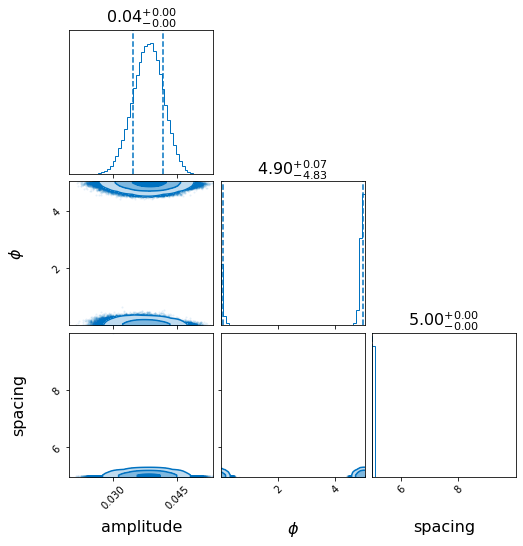

In [4]:
result_json_index_timefix_5 = glob('npoints=1000_duration=50_time_domain_QNM_tau1_fix2/newlikelihood/*0.038*.json')
result_json_index_timefix_5.sort()
len(result_json_index_timefix_5)
posterior_array_timefix_5 = [bilby.result.read_in_result(result_single).posterior for result_single in result_json_index_timefix_5]
posterior_all_plus_timefix_5 = pd.concat(posterior_array_timefix_5,ignore_index=True)

result_timefix_5 = bilby.result.read_in_result(result_json_index_timefix_5[0])
result_timefix_5.posterior = posterior_all_plus_timefix_5
result_timefix_5.plot_corner(save=False)
plt.show()

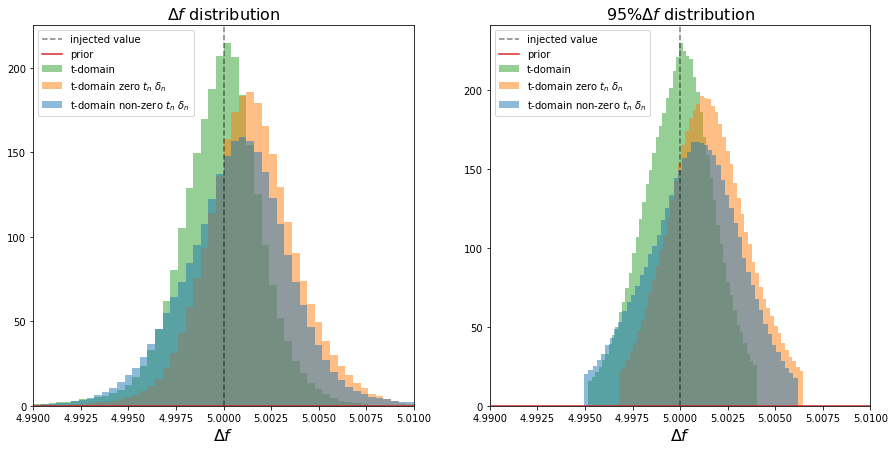

In [5]:
spacing_fre = posterior_all_plus_fre_5.spacing.values
spacing_fre = spacing_fre[(spacing_fre<np.percentile(spacing_fre,97.5))&(spacing_fre>np.percentile(spacing_fre,2.5))]

spacing_timenofix = posterior_all_plus_timenofix_5.spacing.values
spacing_timenofix = spacing_timenofix[(spacing_timenofix<np.percentile(spacing_timenofix,97.5))&(spacing_timenofix>np.percentile(spacing_timenofix,2.5))]

spacing_timefix = posterior_all_plus_timefix_5.spacing.values
spacing_timefix = spacing_timefix[(spacing_timefix<np.percentile(spacing_timefix,97.5))&(spacing_timefix>np.percentile(spacing_timefix,2.5))]

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(posterior_all_plus_fre_5.spacing,bins = 50,range=[4.99,5.01],label = 't-domain' ,color ='C2' ,alpha=0.5,density=True)
plt.hist(posterior_all_plus_timefix_5.spacing,bins = 50,range=[4.99,5.01],label = r't-domain zero $t_n$ $\delta_n$' ,color ='C1' ,alpha=0.5,density=True)
plt.hist(posterior_all_plus_timenofix_5.spacing,bins = 50,range=[4.99,5.01],label = r't-domain non-zero $t_n$ $\delta_n$' ,color ='C0' ,alpha=0.5,density=True)
plt.axvline(5,ls='--',color ='black',label = 'injected value',alpha=0.5)
prior = result_fre_5.priors['spacing']
plt.plot(np.linspace(prior.minimum, prior.maximum, 1000),prior.prob(np.linspace(prior.minimum, prior.maximum, 1000)),color = 'C3',label = 'prior')
plt.legend()
plt.xlabel(r'$\Delta f$',fontsize=16)
plt.title(r'$\Delta f$ distribution',fontsize =16)
plt.xlim(4.99,5.01)
plt.subplot(1,2,2)
plt.hist(spacing_fre,bins = 50,label = 't-domain' ,color ='C2' ,alpha=0.5,density=True)
plt.hist(spacing_timefix,bins = 50,label = r't-domain zero $t_n$ $\delta_n$' ,color ='C1' ,alpha=0.5,density=True)
plt.hist(spacing_timenofix,bins = 50,label = r't-domain non-zero $t_n$ $\delta_n$' ,color ='C0' ,alpha=0.5,density=True)
plt.axvline(5,ls='--',color ='black',label = 'injected value',alpha=0.5)
prior = result_fre_5.priors['spacing']
plt.plot(np.linspace(prior.minimum, prior.maximum, 1000),prior.prob(np.linspace(prior.minimum, prior.maximum, 1000)),color = 'C3',label = 'prior')
plt.xlim(4.99,5.01)
plt.legend()
plt.xlabel(r'$\Delta f$',fontsize=16)
plt.title(r'95%$\Delta f$ distribution',fontsize =16)
plt.show()
# plt.savefig('tau_times_spacing_5.pdf')

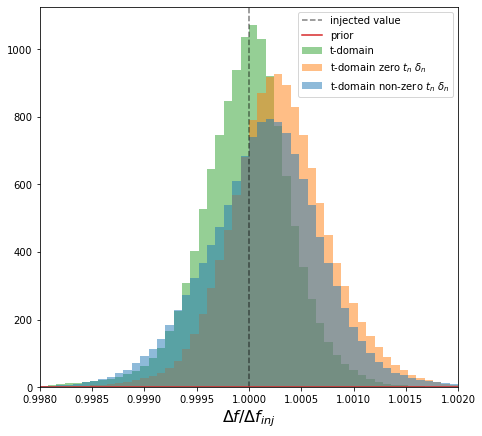

In [10]:
plt.figure(figsize=(7.5,7))
plt.hist(posterior_all_plus_fre_5.spacing/5,bins = 50,range=[4.99/5,5.01/5],label = 't-domain' ,color ='C2' ,alpha=0.5,density=True)
plt.hist(posterior_all_plus_timefix_5.spacing/5,bins = 50,range=[4.99/5,5.01/5],label = r't-domain zero $t_n$ $\delta_n$' ,color ='C1' ,alpha=0.5,density=True)
plt.hist(posterior_all_plus_timenofix_5.spacing/5,bins = 50,range=[4.99/5,5.01/5],label = r't-domain non-zero $t_n$ $\delta_n$' ,color ='C0' ,alpha=0.5,density=True)
plt.axvline(1,ls='--',color ='black',label = 'injected value',alpha=0.5)
prior = result_fre_5.priors['spacing']
plt.plot(np.linspace(prior.minimum/5, prior.maximum/5, 1000),prior.prob(np.linspace(prior.minimum, prior.maximum, 1000)),color = 'C3',label = 'prior')
plt.legend()
plt.xlabel(r'$\Delta f/\Delta f_{inj}$',fontsize=16)
#plt.title(r'$\Delta f$ distribution',fontsize =16)
plt.xlim(4.99/5,5.01/5)
plt.savefig('tau_times_spacing_5.pdf')

## right

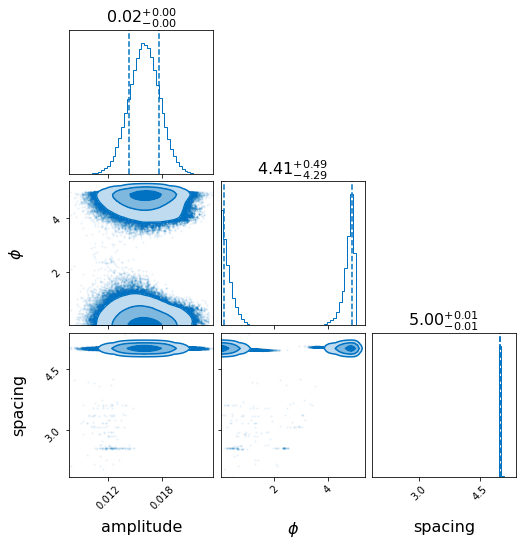

In [11]:
result_json_index_fre_1 = glob('npoints=1000_duration=50_time_domain_QNM_tau0.2_fix_fredomain/newlikelihood/*0.016*.json')
result_json_index_fre_1.sort()
len(result_json_index_fre_1)
posterior_array_fre_1 = [bilby.result.read_in_result(result_single).posterior for result_single in result_json_index_fre_1]
posterior_all_plus_fre_1 = pd.concat(posterior_array_fre_1,ignore_index=True)

result_fre_1 = bilby.result.read_in_result(result_json_index_fre_1[0])
result_fre_1.posterior = posterior_all_plus_fre_1
result_fre_1.plot_corner(save=False)
plt.show()


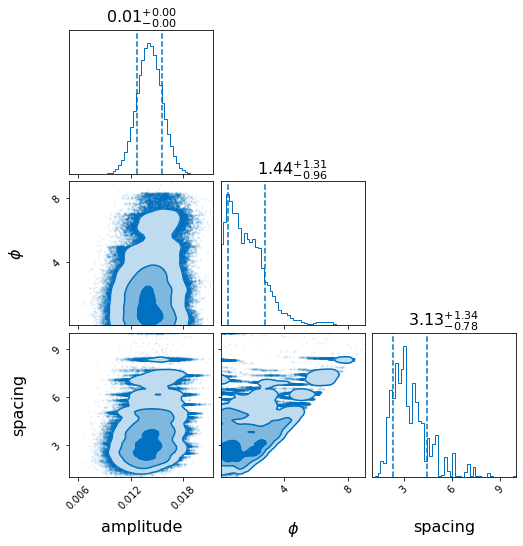

In [12]:
result_json_index_timenofix_1 = glob('npoints=1000_duration=50_time_domain_QNM_tau0.2_nofix/newlikelihood/*0.016*.json')
result_json_index_timenofix_1.sort()
len(result_json_index_timenofix_1)
posterior_array_timenofix_1 = [bilby.result.read_in_result(result_single).posterior for result_single in result_json_index_timenofix_1]
posterior_all_plus_timenofix_1 = pd.concat(posterior_array_timenofix_1,ignore_index=True)

result_timenofix_1 = bilby.result.read_in_result(result_json_index_timenofix_1[0])
result_timenofix_1.posterior = posterior_all_plus_timenofix_1
result_timenofix_1.plot_corner(save=False)
plt.show()

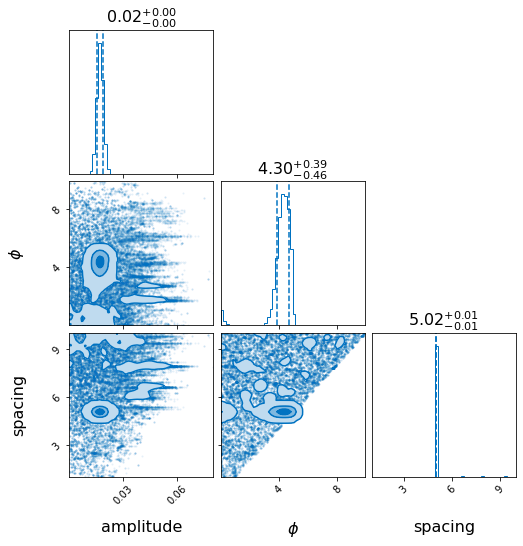

In [13]:
result_json_index_timefix_1 = glob('npoints=1000_duration=50_time_domain_QNM_tau0.2_fix2/newlikelihood/*0.016*.json')
result_json_index_timefix_1.sort()
len(result_json_index_timefix_1)
posterior_array_timefix_1 = [bilby.result.read_in_result(result_single).posterior for result_single in result_json_index_timefix_1]
posterior_all_plus_timefix_1 = pd.concat(posterior_array_timefix_1,ignore_index=True)

result_timefix_1 = bilby.result.read_in_result(result_json_index_timefix_1[0])
result_timefix_1.posterior = posterior_all_plus_timefix_1
result_timefix_1.plot_corner(save=False)
plt.show()

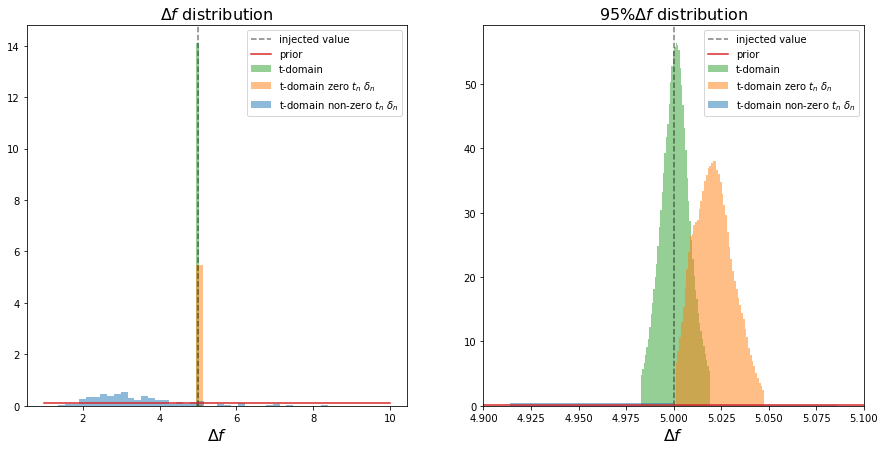

In [14]:
spacing_fre = posterior_all_plus_fre_1.spacing.values
spacing_fre = spacing_fre[(spacing_fre<np.percentile(spacing_fre,97.5))&(spacing_fre>np.percentile(spacing_fre,2.5))]

spacing_timenofix = posterior_all_plus_timenofix_1.spacing.values
spacing_timenofix = spacing_timenofix[(spacing_timenofix<np.percentile(spacing_timenofix,97.5))&(spacing_timenofix>np.percentile(spacing_timenofix,2.5))]

spacing_timefix = posterior_all_plus_timefix_1.spacing.values
spacing_timefix = spacing_timefix[(spacing_timefix<np.percentile(spacing_timefix,97.5))&(spacing_timefix>np.percentile(spacing_timefix,2.5))]

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(posterior_all_plus_fre_1.spacing,bins = 50,label = 't-domain' ,color ='C2' ,alpha=0.5,density=True)
plt.hist(posterior_all_plus_timefix_1.spacing,bins = 50,label = r't-domain zero $t_n$ $\delta_n$' ,color ='C1' ,alpha=0.5,density=True)
plt.hist(posterior_all_plus_timenofix_1.spacing,bins = 50,label = r't-domain non-zero $t_n$ $\delta_n$' ,color ='C0' ,alpha=0.5,density=True)
plt.axvline(5,ls='--',color ='black',label = 'injected value',alpha=0.5)
prior = result_fre_1.priors['spacing']
plt.plot(np.linspace(prior.minimum, prior.maximum, 1000),prior.prob(np.linspace(prior.minimum, prior.maximum, 1000)),color = 'C3',label = 'prior')
plt.legend()
plt.xlabel(r'$\Delta f$',fontsize=16)
plt.title(r'$\Delta f$ distribution',fontsize =16)
plt.subplot(1,2,2)
plt.hist(spacing_fre,bins = 50,label = 't-domain' ,color ='C2' ,alpha=0.5,density=True)
plt.hist(spacing_timefix,bins = 50,label = r't-domain zero $t_n$ $\delta_n$' ,color ='C1' ,alpha=0.5,density=True)
plt.hist(spacing_timenofix,bins = 50,label = r't-domain non-zero $t_n$ $\delta_n$' ,color ='C0' ,alpha=0.5,density=True)
plt.xlim(4.9,5.1)
plt.axvline(5,ls='--',color ='black',label = 'injected value',alpha=0.5)
prior = result_fre_1.priors['spacing']
plt.plot(np.linspace(prior.minimum, prior.maximum, 1000),prior.prob(np.linspace(prior.minimum, prior.maximum, 1000)),color = 'C3',label = 'prior')
plt.xlim(4.9,5.1)
plt.legend()
plt.xlabel(r'$\Delta f$',fontsize=16)
plt.title(r'95%$\Delta f$ distribution',fontsize =16)
plt.show()
# plt.savefig('tau_times_spacing_1.pdf')

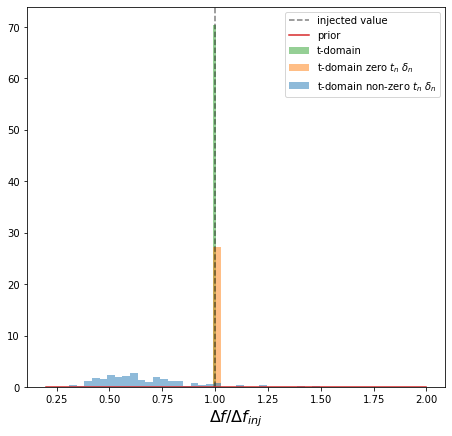

In [15]:
plt.figure(figsize=(7.5,7))
plt.hist(posterior_all_plus_fre_1.spacing/5,bins = 50,label = 't-domain' ,color ='C2' ,alpha=0.5,density=True)
plt.hist(posterior_all_plus_timefix_1.spacing/5,bins = 50,label = r't-domain zero $t_n$ $\delta_n$' ,color ='C1' ,alpha=0.5,density=True)
plt.hist(posterior_all_plus_timenofix_1.spacing/5,bins = 50,label = r't-domain non-zero $t_n$ $\delta_n$' ,color ='C0' ,alpha=0.5,density=True)
plt.axvline(5/5,ls='--',color ='black',label = 'injected value',alpha=0.5)
prior = result_fre_1.priors['spacing']
plt.plot(np.linspace(prior.minimum/5, prior.maximum/5, 1000),prior.prob(np.linspace(prior.minimum, prior.maximum, 1000)),color = 'C3',label = 'prior')
plt.legend()
plt.xlabel(r'$\Delta f/\Delta f_{inj}$',fontsize=16)
# plt.title(r'$\Delta f$ distribution',fontsize =16)

plt.savefig('tau_times_spacing_1.pdf')